In [31]:
import awkward as ak
import dask 
ak.__version__

'1.8.0'

In [20]:
a = dask.delayed(ak.from_parquet)("TestDask/TestParquetOutput/ttbar_chunk0.parquet", lazy=True)
adict = {"ttbar": {"nominal_Loose": a["ttbar"]["nominal_Loose"][0]}}
data =  adict["ttbar"]["nominal_Loose"]

In [23]:
jets_pt = data["jet_pt"]
jets_pt = dask.delayed(ak.mask)(jets_pt, dask.delayed(ak.count)(jets_pt, axis =1)>=1)
jet1pt = jets_pt[:,0] 

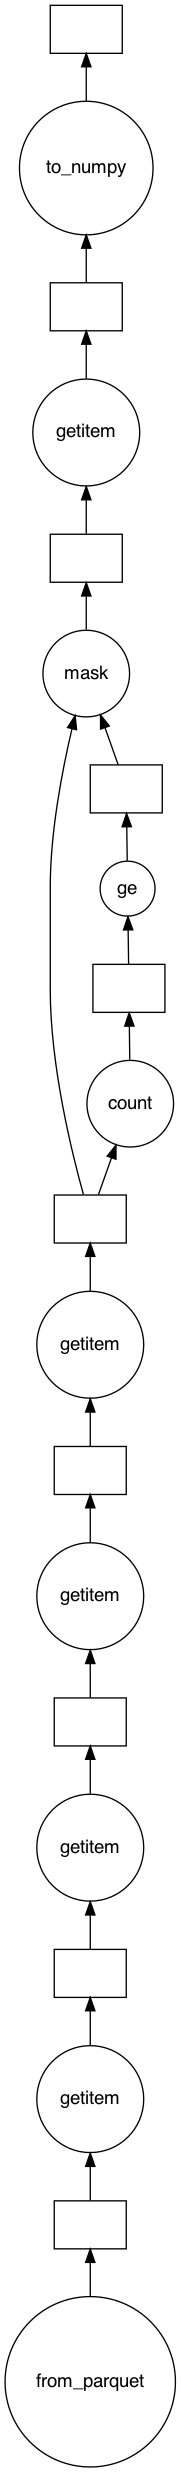

In [30]:
npjet = jet1pt.to_numpy()
npjet.visualize()